<center>
<img src="logo.png" height="900"> 
</center>


#  Акции

В этом задании мы немного поработаем с ценами на акции. 

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

В табличке `prices.tsv` лежат данные о том как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по каждой из ценных бумаг.  Подгрузим эти таблицы и посмотрим на них. 

In [2]:
df_prices = pd.read_csv('data/price.tsv', sep='\t')

# сделали дату индексом таблицы и применили это преобразование
df_prices.set_index('Date', inplace=True)  
df_prices.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-02,18.982769,10.030768,51.945328,32.324974,NaN,26.103115,11.17,17.431229,32.489162,29.600000,...,43.086357,28.942909,21.664534,NaN,24.980757,49.945686,27.59,20.329309,NaN,NaN
2010-08-03,18.337280,10.049624,51.148121,32.334858,NaN,25.590956,10.97,17.490696,32.223312,29.120001,...,43.628933,29.177372,21.289482,NaN,24.594522,50.279709,27.40,20.080635,NaN,NaN
2010-08-04,18.633682,9.455699,51.877274,32.464500,NaN,25.915325,10.50,17.553665,32.497211,29.700001,...,43.628933,29.674450,21.488039,NaN,24.808437,50.873531,28.09,20.089518,NaN,NaN
2010-08-05,18.745655,9.088029,52.373096,32.306469,NaN,25.898251,10.26,17.483702,32.199158,29.440001,...,43.621983,29.590042,21.267420,NaN,25.200619,50.567337,30.35,19.636568,NaN,NaN
2010-08-06,18.923494,8.946616,51.284237,32.107712,NaN,25.812889,9.98,17.690086,32.440819,29.230000,...,43.107220,29.599421,21.157112,NaN,25.170906,50.084862,30.24,19.227848,NaN,NaN


In [3]:
df_inf = pd.read_csv('data/information.tsv', sep='\t')
df_inf.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


> Давайте решим пробную задачку, чтобы вы понимали, как устроена система тестирования. 

В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? Запишите результат в пременную `n_nasdaq`.

In [4]:
n_nasdaq = df_inf['NASDAQ'].sum() # каждое True это 1, а False 0
n_nasdaq

103

Все ваши расчёты будут тестироваться с помощью вот таких тестов. 

In [5]:
assert n_nasdaq == 103

Мы положили в переменную `n_nasdaq` число ценных бумаг, как и требовалось в задании. Тесты прошли и всё успешно отработало. Подобные тесты сделаны по каждому заданию, но скрыты от вас. Вы довольно часто будете видеть ячейки с комментарием: 

In [6]:
# проверка, что задание решено корректно

Он означает, что внутри этой ячейки есть секретные тесты, которые сами запустятся, когда нажмёте на кнопку __Submit assignment.__

__а)__ Теперь настоящее задание. Сколько ценных бумаг входят во все три индекса сразу?

In [7]:
df_inf[(df_inf.NASDAQ==True)&(df_inf['S&P-500']==True)&(df_inf.DJI==True)]

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
119,CSCO,Cisco Systems,reports,Information Technology,Communications Equipment,"San Jose, California",01.12.93,858877.0,1984.0,True,True,True
247,INTC,Intel Corp.,reports,Information Technology,Semiconductors,"Santa Clara, California",31.12.76,50863.0,1968.0,True,True,True
331,MSFT,Microsoft Corp.,reports,Information Technology,Systems Software,"Redmond, Washington",01.06.94,789019.0,1975.0,True,True,True
496,WBA,Walgreens Boots Alliance,reports,Consumer Staples,Drug Retail,"Deerfield, Illinois",31.12.79,1618921.0,2014.0,True,True,True


In [8]:
n_sp = df_inf[(df_inf.NASDAQ==True)&
              (df_inf['S&P-500']==True)&
              (df_inf.DJI==True)].count()[0]

In [9]:
# проверка, что задание решено корректно
assert n_sp < 10

# Подобные тесты скрыты от вас

__б)__ В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [10]:
df_inf.dtypes

Symbol                    object
Security                  object
SEC filings               object
GICS Sector               object
GICS Sub Industry         object
Headquarters Location     object
Date first added          object
CIK                      float64
Founded                  float64
S&P-500                     bool
NASDAQ                      bool
DJI                         bool
dtype: object

In [11]:
n_founded = df_inf[(1801.0 < df_inf["Founded"]) &
                    (df_inf["Founded"] < 1900.0)].count()[0]
n_founded

95

In [12]:
# проверка, что задание решено корректно
assert n_founded < 100

# Подобные тесты скрыты от вас

__в)__  В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных? Все пропуски в этой колонке удалите методом `.dropna()`. 

In [13]:
df_drop = df_inf["GICS Sector"].dropna()
df_drop.value_counts().count()

11

In [14]:
n_sectors = df_drop.value_counts().count()

In [15]:
# проверка, что задание решено корректно
assert n_sectors > 5
assert n_sectors < 15

# Подобные тесты скрыты от вас

__г)__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора? 

In [16]:
top3 = df_inf.groupby('GICS Sector')['S&P-500'].agg('count')
top3

GICS Sector
Communication Services    26
Consumer Discretionary    61
Consumer Staples          33
Energy                    26
Financials                66
Health Care               62
Industrials               73
Information Technology    71
Materials                 28
Real Estate               31
Utilities                 28
Name: S&P-500, dtype: int64

In [17]:
n_top3 = top3.sort_values(ascending=False)[:3].sum()
n_top3

210

In [18]:
# проверка, что задание решено корректно
assert n_top3 < 300
assert n_top3 > 200

# Подобные тесты скрыты от вас

__д)__ У скольки компаний тикер (краткое название из колонки `Symbol`) состоит из трёх букв? 

In [39]:
ticker = df_inf.Symbol.apply(len)
n_ticker = ticker[ticker==3].count()
n_ticker

308

In [40]:
# проверка, что задание решено корректно
assert n_ticker > 300

# Подобные тесты скрыты от вас

А из другого количества букв? Заведите колонку `letter_count` с числом букв в тикере, а после подсчитайте как часто в ней встречаются разные значения. 

In [61]:
df_inf['letter_count'] = ticker
df_inf[['Symbol', 'letter_count']].head()

,Symbol,letter_count
0,A,1
1,AAL,3
2,AAP,3
3,AAPL,4
4,ABBV,4


Создайте в таблице новую колонку `first_letter`. Запишите туда первую букву каждого тикера из колонки `Symbol`. Какая буква встречается на первом месте чаще всего? 

In [65]:
df_inf['first_letter'] = df_inf.Symbol.apply(lambda name: name[0])
df_inf[['Symbol', 'first_letter']].head()

,Symbol,first_letter
0,A,A
1,AAL,A
2,AAP,A
3,AAPL,A
4,ABBV,A


In [77]:
letter = df_inf.groupby('first_letter').Symbol.agg('count').sort_values(ascending=False)
letter.head()

first_letter
A    56
C    51
M    35
P    30
D    27
Name: Symbol, dtype: int64

In [83]:
popular_letter = 'A'
popular_letter

'A'

In [84]:
# проверка, что задание решено корректно
assert popular_letter != 'T'

# Подобные тесты скрыты от вас

__е)__ Теперь поработаем со стоимостью акций. 

- Из таблицы `df_inf` возьмите колонку `Symbol` и сохраните значения из неё, `.values`, в вектор tickers
- Выберите из вектора 10 случайных тикеров командой `np.random.choice`, опцию `replace` установить в `False`, нам нужна выборка без повторений

In [118]:
tickers = df_inf.Symbol.values
tickers10 = np.random.choice(tickers, 10, replace=False) # replace=False без повторений
print(tickers10, tickers.size, sep='\n')

['RHI' 'MCK' 'MRK' 'XRAY' 'INTU' 'DRI' 'ECL' 'TGT' 'XEL' 'AME']
525


In [103]:
# проверка, что задание решено корректно
assert tickers.size > 500

# Подобные тесты скрыты от вас

Методом `.plot` постройте для выбранных 10 тикеров картинку с динамикой их цен. В скобках у `.plot()` допишите `figsize=(12,7)`, чтобы отрегулировать размер картинки.

In [120]:
y = df_prices[tickers10]
y.head()

,RHI,MCK,MRK,XRAY,INTU,DRI,ECL,TGT,XEL,AME
Date,,,,,,,,,,
2010-08-02,21.189417,58.330635,24.884062,28.942909,36.593033,27.128212,43.602287,38.681923,15.525545,18.536882
2010-08-03,21.066505,57.044609,24.706665,29.177372,36.647614,27.051249,43.300537,38.106365,15.358756,18.503815
2010-08-04,21.631886,57.843769,24.969200,29.674450,37.093449,27.134619,43.930672,38.495056,15.191968,18.681538
2010-08-05,21.287743,57.724361,24.884062,29.590042,36.784096,27.019188,43.797535,39.511612,15.330960,18.760063
2010-08-06,20.746944,57.696804,24.820196,29.599421,37.002453,26.820374,43.637787,39.107979,15.372655,18.797268


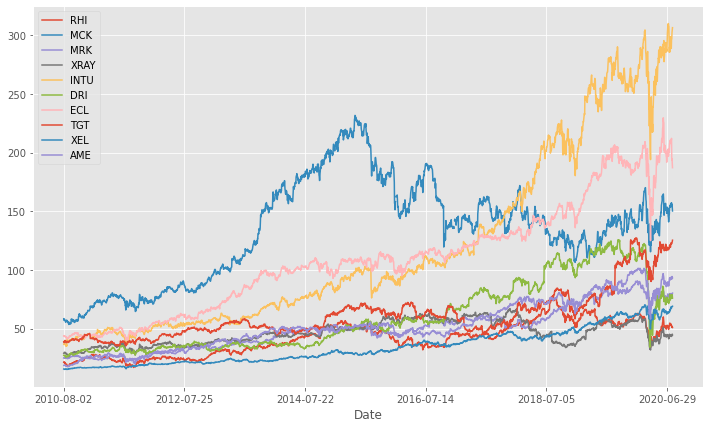

In [124]:
y.plot(figsize=(12,7));

Методом `.hist()` постройте для этих цен гистограммы. Выберите количество бинов `bins` равное $25$, опцию `density` поставьте в `True`. Это отнормирует высоту столбиков так, чтобы сумма площадей под ними была равна единице. 

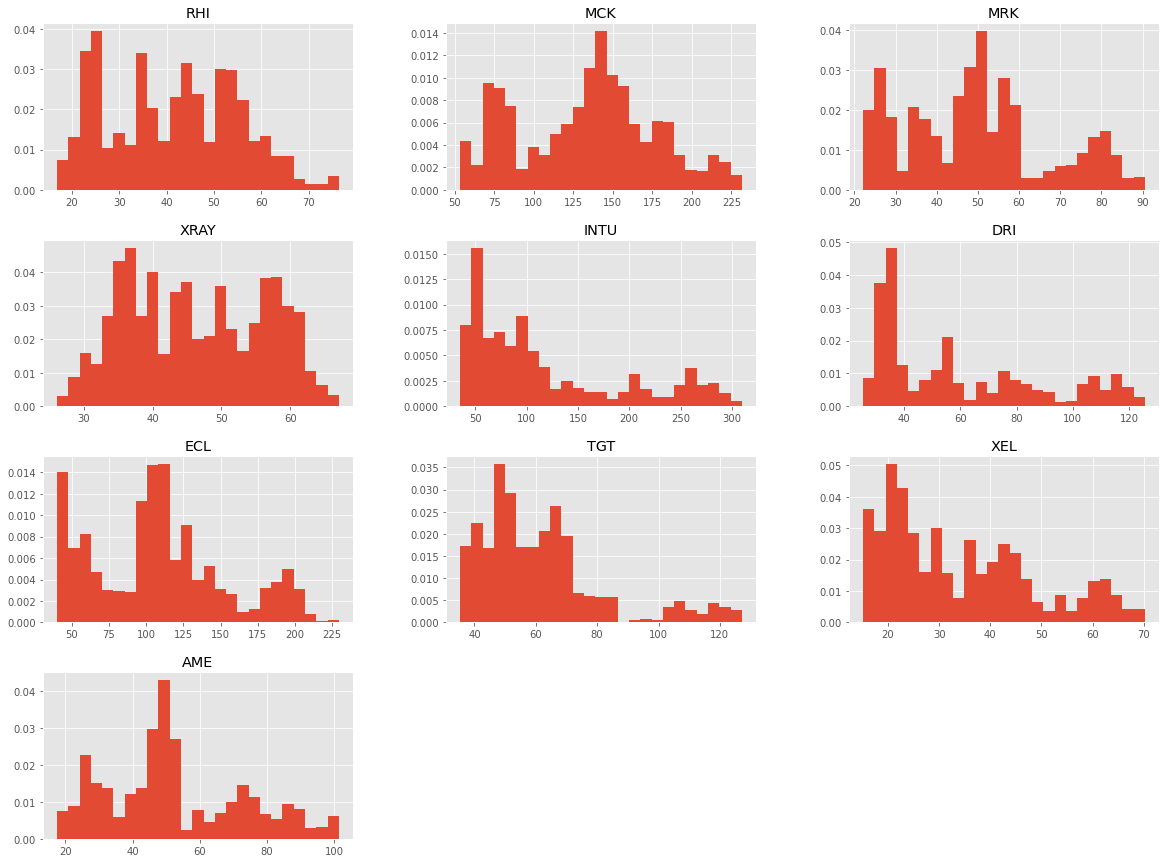

In [130]:
y.hist(figsize=(20, 15), bins=25, density=True);

- Как скорее всего распределена стоимость акций?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

Финансовые продукты характеризуются двумя основными характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [156]:
rasnost = df_prices.diff()
Pt_1 = df_prices.shift(1)

Rt = rasnost/Pt_1
Rt = Rt.drop('2010-08-02')
Rt.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-03,-0.034004,0.001880,-0.015347,0.000306,NaN,-0.019621,-0.017905,0.003412,-0.008183,-0.016216,...,0.012593,0.008101,-0.017312,NaN,-0.015461,0.006688,-0.006887,-0.012232,NaN,NaN
2010-08-04,0.016164,-0.059099,0.014256,0.004009,NaN,0.012675,-0.042844,0.003600,0.008500,0.019918,...,0.000000,0.017036,0.009327,NaN,0.008698,0.011810,0.025183,0.000442,NaN,NaN
2010-08-05,0.006009,-0.038883,0.009558,-0.004868,NaN,-0.000659,-0.022857,-0.003986,-0.009172,-0.008754,...,-0.000159,-0.002844,-0.010267,NaN,0.015808,-0.006019,0.080456,-0.022547,NaN,NaN
2010-08-06,0.009487,-0.015560,-0.020790,-0.006152,NaN,-0.003296,-0.027291,0.011804,0.007505,-0.007133,...,-0.011801,0.000317,-0.005187,NaN,-0.001179,-0.009541,-0.003624,-0.020814,NaN,NaN
2010-08-09,0.037940,0.025290,0.009668,0.006382,NaN,-0.006283,0.025050,0.006130,0.007450,0.009921,...,0.007746,0.006654,0.016684,NaN,0.007790,0.000186,0.006614,0.009242,NaN,NaN


In [159]:
df_r = Rt
df_r.iloc[0, 0]

-0.034003929489437486

In [160]:
# проверка, что задание решено корректно
assert df_r.iloc[0,0] < 1

# Подобные тесты скрыты от вас

Методом `.plot` постройте для выбранных ранее 10  случайных тикеров картинку с динамикой доходностей. 

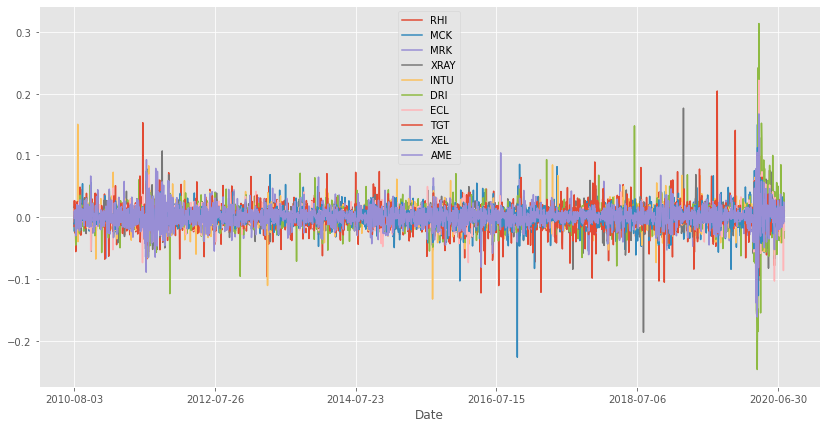

In [172]:
z = df_r[tickers10]
z.plot(figsize=(14, 7));

Постройте для доходностей этих десяти тикеров гистограммы. 

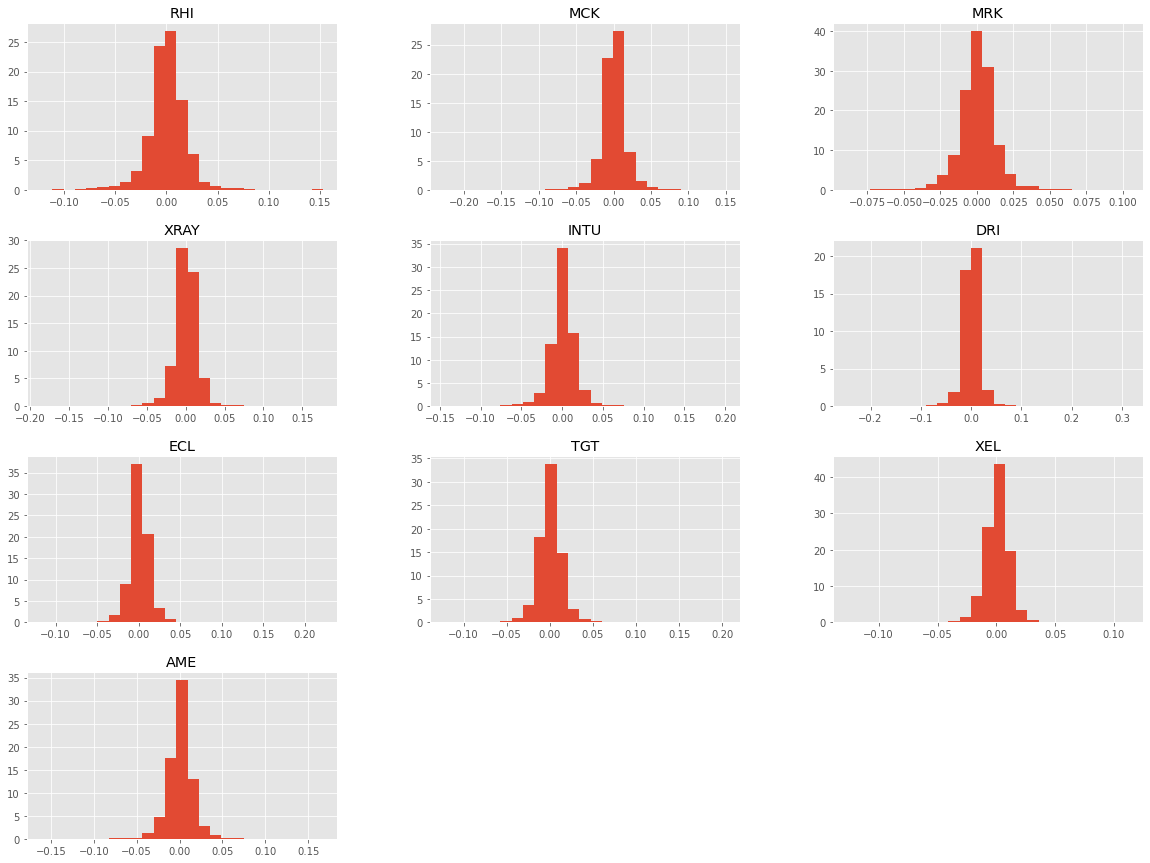

In [180]:
z.hist(figsize=(20, 15), bins=25, density=True);

Постройте для доходностей этих 10 бумаг ящики с усами. Для этого в опциях команды `plot` укажите `'kind'='box'`. 

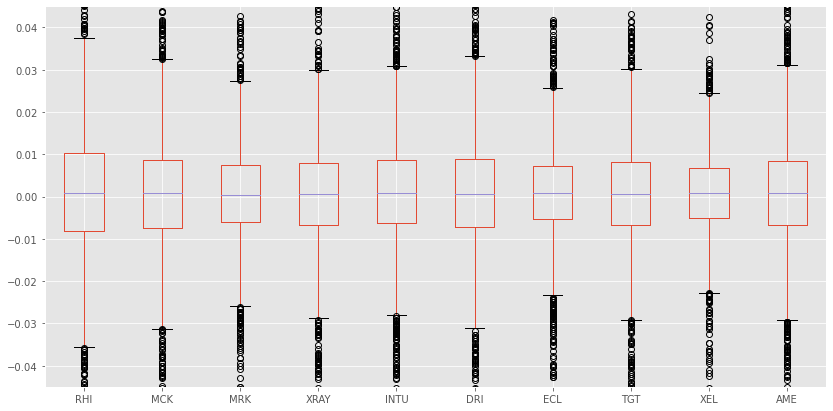

In [190]:
z.boxplot(figsize=(14, 7))
plt.ylim(-0.045, 0.045);

__Выводы:__ 

Доходности по нашим акциям имеют распределение похожее на нормальное, но есть отличие. По ящикам с усами видно, что в данных есть довольно большое количество выбросов. Это сигнализирует о том, что у распределения доходностей хвосты оказываются более тяжёлыми, чем у нормального распределения. То есть под ними сосредоточено больше вероятностной массы и из-за этого редкие события более вероятны, чем для нормального распределения. Такую особенность финансовых данных мы более подробно будем обсуждать в будущем. 

Кроме того, по построенным визуализациям видно, что средние доходности практически для всех ценных бумаг находится близко к нулю.

__ё)__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Посчитайте для всех компаний среднюю доходность. Найдите 10 самых доходных компаний и 10 самых убыточных. 

### Пример создания дата фрейма

In [287]:
down = ['APA','SLB','WRK','KHC','DVN']
down_n = [-0.000141, -0.000151, -0.000165, -0.000217, -0.000258]
d = {'mean': pd.Series(down_n, index=down)}
d_f = pd.DataFrame(d)
d_f

,mean
APA,-0.000141
SLB,-0.000151
WRK,-0.000165
KHC,-0.000217
DVN,-0.000258


In [298]:
R  = df_r.mean(axis=0) # средние доходности 

# list из тикеров 10 самых доходных компаний отсортированный по алфавиту
rtop_10 = R.sort_values(ascending=False)[:10].sort_index().index

# list из тикеров 10 самых убыточных (минимальная доходность) компаний отсортированный по алфавиту
rbottom_10 = R.sort_values(ascending=False)[-10:].sort_index().index

print(R, rtop_10, rbottom_10, sep='\n\n')

A       0.000808
AAL     0.000549
AAP     0.000585
AAPL    0.001179
ABBV    0.000873
          ...   
ZBH     0.000516
ZBRA    0.001163
ZION    0.000387
ZM      0.005266
ZTS     0.000995
Length: 523, dtype: float64

Index(['CARR', 'DOCU', 'DXCM', 'HWM', 'MRNA', 'OTIS', 'PAYC', 'TSLA', 'TT',
       'ZM'],
      dtype='object')

Index(['APA', 'COTY', 'DVN', 'FOX', 'FOXA', 'KHC', 'SLB', 'UA', 'VIAC', 'WRK'], dtype='object')


In [292]:
# проверка, что задание решено корректно
assert 'DXCM' in rtop_10
assert 'SLB' in rbottom_10

# Подобные тесты скрыты от вас

Есть ли среди самых доходных компаний Тесла? :) 

__ж)__ Мы поговорили о доходности. Теперь поговорим о риске. Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. 

Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых. 

In [299]:
STD  = df_r.std()           # стандартные отклонения доходностей

# list из тикеров 10 самых доходных компаний отсортированный по алфавиту
stdtop_10 = STD.sort_values(ascending=False)[:10].sort_index().index      

# list из тикеров 10 самых убыточных компаний отсортированный по алфавиту
stdbottom_10 = STD.sort_values(ascending=False)[-10:].sort_index().index   

print(STD, stdtop_10, stdbottom_10, sep='\n\n')

A       0.018245
AAL     0.032635
AAP     0.020001
AAPL    0.017418
ABBV    0.018026
          ...   
ZBH     0.016295
ZBRA    0.022447
ZION    0.020216
ZM      0.042977
ZTS     0.015937
Length: 523, dtype: float64

Index(['AMD', 'CARR', 'DOW', 'HWM', 'MRNA', 'TSLA', 'TT', 'UA', 'VIAC', 'ZM'], dtype='object')

Index(['CL', 'DUK', 'GIS', 'JNJ', 'KMB', 'KO', 'PEP', 'PG', 'VZ', 'WM'], dtype='object')


In [300]:
# проверка, что задание решено корректно
assert 'TSLA' in stdtop_10
assert 'PEP' in stdbottom_10

# Подобные тесты скрыты от вас

Есть ли среди самых рискованных компаний Тесла? :) 

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Построим для наших ценных бумаг диаграмму рассеивания, на которой будет видно где по своей доходности и риску находится какая ценная бумага. 

Если вы корректно решили все предыдущие пункты, вам достаточно просто запустить код ниже и он выполнится сам. 

In [301]:
# таблица с доходностями и риском
data = pd.DataFrame({'std': STD, 'r': R})

# добавили сектора экономики для каждой из ценных бумаг
data = data.join(df_inf.set_index('Symbol')['GICS Sector'])
data.fillna('another sector')
data.head()

,std,r,GICS Sector
A,0.018245,0.000808,Health Care
AAL,0.032635,0.000549,Industrials
AAP,0.020001,0.000585,Consumer Discretionary
AAPL,0.017418,0.001179,Information Technology
ABBV,0.018026,0.000873,Health Care


/Users/mac/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


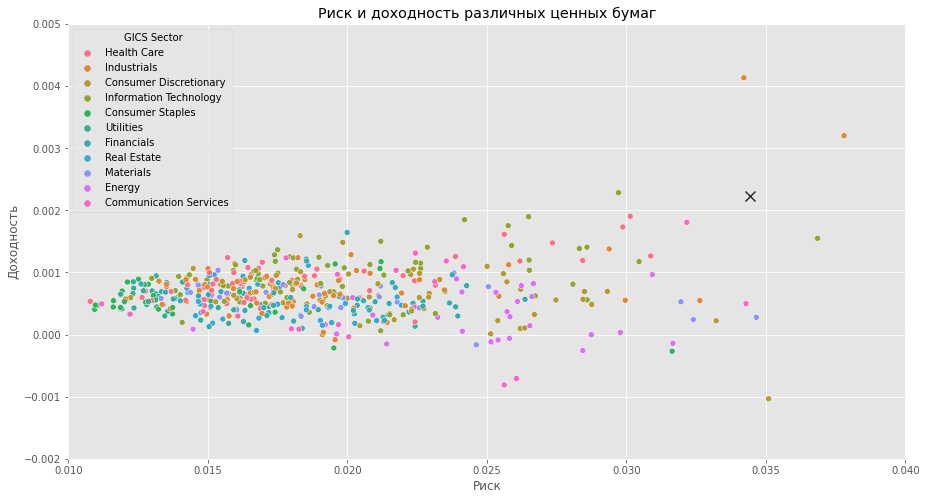

In [302]:
plt.figure(figsize=(15, 8))

sns.scatterplot(data=data, x='std', y='r', hue='GICS Sector')

tsla = data.loc['TSLA']
sns.regplot([tsla['std']], [tsla['r']], scatter=True, fit_reg=False, 
            marker='x', color='black', scatter_kws={'s':100}) 

plt.ylim(-0.002, 0.005)
plt.xlim(0.01, 0.04)

plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Риск и доходность различных ценных бумаг');

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ Чёрным крестиком отдельно отмечена Тесла, которая обладает довольно высокими доходностью и риском.

> Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

Сделайте группировку (`groupby`) для таблицы `data` по секторам экономики. Какой из секторов экономики обладает самым низким медианным значением риска? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_agg = ...      # таблица после группировки 
min_sector = ...  # название сектора с минимальным медианным риском
max_sector = ...  # название сектора с максимальной доходностью 

# your code here


In [ ]:
# проверка, что задание решено корректно
assert min_sector == 'Utilities'

# Подобные тесты скрыты от вас

__з)__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают VaR. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $VaR$.
Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль на уровне $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ VaR по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Не забудьте умножить результаты на $-1$ перед сортировкой. 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

VaR  = ...           # Value at risk по нашим бумагам
VaRtop_10 = ...      # list из тикеров 10 самых рисковых компаний отсортированный по алфавиту
VaRbottom_10 = ...   # list из тикеров 10 самых безрисковых компаний отсортированный по алфавиту

# your code here


In [ ]:
# проверка, что задание решено корректно
assert 'TSLA' in VaRtop_10 
assert 'PG' in VaRbottom_10

# Подобные тесты скрыты от вас

$VaR$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $VaR$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$?…

__и)__  __Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $VaR$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $ES$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Сколько денег мы заработаем в $5\%$ лучших случаем к концу дня? 

__Важно:__ VaR и Es в этом пункте - отрицательные числа.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

var_tsla = ...   # VaR для Теслы
es_tsla  = ...   # ES для теслы 
loss = ...       # Потеря от 1000$
profit = ...     # Заработок от 1000$

# your code here


In [ ]:
# проверка, что задание решено корректно
assert np.abs(es_tsla + 0.073254619) < 1e-5

# Подобные тесты скрыты от вас

## Какая метрика лучше? 

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона "Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок." 

Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы. Из-за этого методы оценки риска продвинулись довольно сильно вперёд и ещё появятся в будущих домашних заданиях нашего курса. 

<center>
<img src="memes01.png" width="500"> 
</center>